# Results Analysis

In [2]:
%matplotlib inline
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import numpy as np
import os
import time
from datetime import timedelta

### Load dataset

In [3]:
input_file_name = "lotOfFeatures.csv"
input_file_path = os.path.join(os.path.join(os.getcwd(), "data"), input_file_name)

original_data = pd.read_csv(input_file_path, index_col=0, parse_dates=True)
originalSize = original_data.shape[1]
original_data.head()
original_data.shape

(139678, 535)

## Excluding Testing Set

Spliting the dataset into three parts: training, testing and evaluation (last 10 percent).

In [4]:
start_time = '2012-02-01 00:00:00'
#start_time = '2013-01-01 00:00:00'
#start_time = '2014-02-01 00:00:00'
splitting_point = int(0.8 * original_data.shape[0])
splitting_time = original_data.iloc[[splitting_point]].index.to_pydatetime()[0]
#data = original_data[:splitting_time]
data = original_data[start_time:]

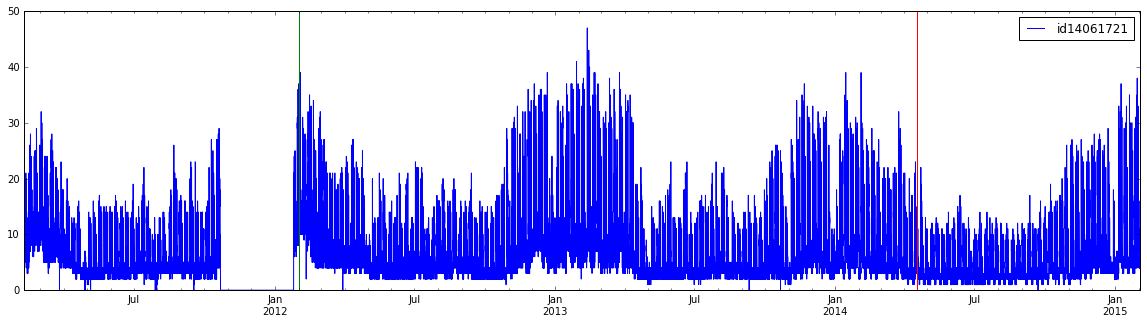

In [5]:
f = original_data[["id14061721"]].plot(figsize=(20,5)) 
original_data.iloc(splitting_point)
f.axvline(start_time, color='g')
f.axvline(splitting_time, color='r')

Testing how to iterate day by day

## Results analysis

In [124]:
# read from csv
#output_file_name = "eval_top20_id14061721_big.csv"
#output_file_name = "eval_top20_id12041992_big.csv"
#output_file_name = "eval_top20_id12041022_big.csv"
output_file_name = "eval_top20_id11010024_big.csv"

input_file_path = os.path.join(os.path.join(os.getcwd(), "data"), output_file_name)
test =  pd.read_csv(input_file_path, index_col=[0,1,2], header=[0,1])

test

sensor                                                                            id11010024  \
results                                                                                 true   
horizon dataset       model                                                                    
1.0     Last value    Baselines            [array([ 0. ,  1. ,  0. , ...,  0.7,  0.8,  0....   
        Previous day  Baselines            [array([ 0. ,  1. ,  0. , ...,  0.7,  0.8,  0....   
        Previous week Baselines            [array([ 0. ,  1. ,  0. , ...,  0.7,  0.8,  0....   
        AR_WF_DT      Ridge Regression     [ list([0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0...   
                      K Nearest Neighbors  [ list([0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0...   
                      Random Forest        [ list([0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0...   
3.0     Last value    Baselines            [array([ 0. ,  1. ,  0. , ...,  0.7,  0.6,  0....   
        Previous day  Baselines            [array([ 0. ,  1. ,  0. , ...,  0.7,  0.6,  0....   
        Previous week Baselines            [array([ 0. ,  1. ,  0. , ...,  0.7,  0.6,  0....   
        AR_WF_DT      Ridge Regression     [ list([0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0...   
                      K Nearest Neighbors  [ list([0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0...   
                      Random Forest        [ list([0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0...   
5.0     Last value    Baselines            [array([ 0. ,  1. ,  0. , ...,  0.7,  0.6,  0....   
        Previous day  Baselines            [array([ 0. ,  1. ,  0. , ...,  0.7,  0.6,  0....   
        Previous week Baselines            [array([ 0. ,  1. ,  0. , ...,  0.7,  0.6,  0....   
        AR_WF_DT      Ridge Regression     [ list([0.0, 1.0, 0.0, 2.0, 4.0, 4.0, 3.0, 4.0...   
                      K Nearest Neighbors  [ list([0.0, 1.0, 0.0, 2.0, 4.0, 4.0, 3.0, 4.0...   
                      Random Forest        [ list([0.0, 1.0, 0.0, 2.0, 4.0, 4.0, 3.0, 4.0...   
7.0     Last value    Baselines            [array([ 2. ,  4. ,  3. , ...,  0.2,  0.4,  0....   
        Previous day  Baselines            [array([ 2. ,  4. ,  3. , ...,  0.2,  0.4,  0....   
        Previous week Baselines            [array([ 2. ,  4. ,  3. , ...,  0.2,  0.4,  0....   
        AR_WF_DT      Ridge Regression     [ list([2.0, 4.0, 3.0, 4.0, 2.0, 4.0, 3.0, 3.0...   
                      K Nearest Neighbors  [ list([2.0, 4.0, 3.0, 4.0, 2.0, 4.0, 3.0, 3.0...   
                      Random Forest        [ list([2.0, 4.0, 3.0, 4.0, 2.0, 4.0, 3.0, 3.0...   
9.0     Last value    Baselines            [array([ 4. ,  2. ,  4. , ...,  0.6,  0.3,  0....   
        Previous day  Baselines            [array([ 4. ,  2. ,  4. , ...,  0.6,  0.3,  0....   
        Previous week Baselines            [array([ 4. ,  2. ,  4. , ...,  0.6,  0.3,  0....   
        AR_WF_DT      Ridge Regression     [ list([4.0, 2.0, 4.0, 3.0, 4.0, 3.0, 4.0, 1.0...   
                      K Nearest Neighbors  [ list([4.0, 2.0, 4.0, 3.0, 4.0, 3.0, 4.0, 1.0...   
                      Random Forest        [ list([4.0, 2.0, 4.0, 3.0, 4.0, 3.0, 4.0, 1.0...   
...                                                                                      ...   
15.0    Last value    Baselines            [array([ 1. ,  0. ,  0. , ...,  0.7,  0.6,  0....   
        Previous day  Baselines            [array([ 1. ,  0. ,  0. , ...,  0.7,  0.6,  0....   
        Previous week Baselines            [array([ 1. ,  0. ,  0. , ...,  0.7,  0.6,  0....   
        AR_WF_DT      Ridge Regression     [ list([1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0...   
                      K Nearest Neighbors  [ list([1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0...   
                      Random Forest        [ list([1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0...   
17.0    Last value    Baselines            [array([ 1. ,  0. ,  0. , ...,  0.9,  2. ,  1....   
        Previous day  Baselines            [array([ 1. ,  0. ,  

In [33]:
test.xs(['AR_WF_DT', "Random Forest"],level=["dataset","model"]).xs(
        ["id14061721"], level=['sensor'], axis=1)[['true', 'predicted']]

results,true,predicted
horizon,,
1.0,"[ list([4.0, 4.0, 4.0, 5.0, 4.0, 5.0, 4.0, 4.0...","[ list([4.2660965733950658, 4.2677420079971569..."
3.0,"[ list([5.0, 4.0, 4.0, 4.0, 4.0, 5.0, 4.0, 4.0...","[ list([4.0504227326258526, 3.9825033806111412..."
5.0,"[ list([4.0, 4.0, 4.0, 4.0, 6.0, 9.0, 8.0, 8.0...","[ list([4.1229292458455591, 4.1360170216182812..."
7.0,"[ list([11.0, 12.0, 12.0, 15.0, 13.0, 12.0, 11...","[ list([6.1965374039499999, 9.2851297693771144..."
9.0,"[ list([12.0, 12.0, 15.0, 13.0, 10.0, 10.0, 9....","[ list([13.580552881912672, 13.292174825964981..."
11.0,"[ list([8.0, 10.0, 9.0, 8.0, 8.0, 9.0, 9.0, 9....","[ list([10.38075434278419, 9.6573349472734673,..."
13.0,"[ list([8.0, 9.0, 7.0, 7.0, 5.0, 6.0, 6.0, 6.0...","[ list([8.5794956494231887, 8.7370586355014126..."
15.0,"[ list([6.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0, 7.0...","[ list([5.7250584047413282, 5.4996769485092196..."
17.0,"[ list([7.0, 5.0, 6.0, 8.0, 7.0, 7.0, 7.0, 4.0...","[ list([4.9938725591375421, 5.3008969506655204..."


In [125]:
true = test.xs(['AR_WF_DT', "Random Forest"],level=["dataset","model"]).xs(
    ["id11010024"], level=['sensor'], axis=1)['true'].apply(lambda x: eval(x)[0])[1]

pred = test.xs(['AR_WF_DT', "Random Forest"],level=["dataset","model"]).xs(
    ["id11010024"], level=['sensor'], axis=1)['predicted'].apply(lambda x: eval(x)[0])[1]

l = pd.DataFrame({'true': true, 'pred': pred})

l['diff'] = abs(l['pred'] - l['true'])

l

,pred,true,diff
0,0.714112,0.0,0.714112
1,0.178635,1.0,0.821365
2,0.306321,0.0,0.306321
3,0.297629,0.0,0.297629
4,0.300480,1.0,0.699520
5,0.542250,0.0,0.542250
6,0.301544,0.0,0.301544
7,0.294242,0.0,0.294242
8,0.439353,0.0,0.439353
9,0.535841,1.0,0.464159


### id14061721

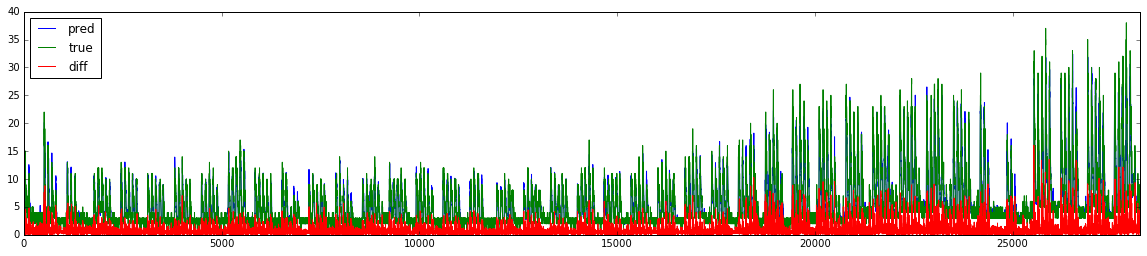

In [114]:
l.plot(figsize=(20,4))

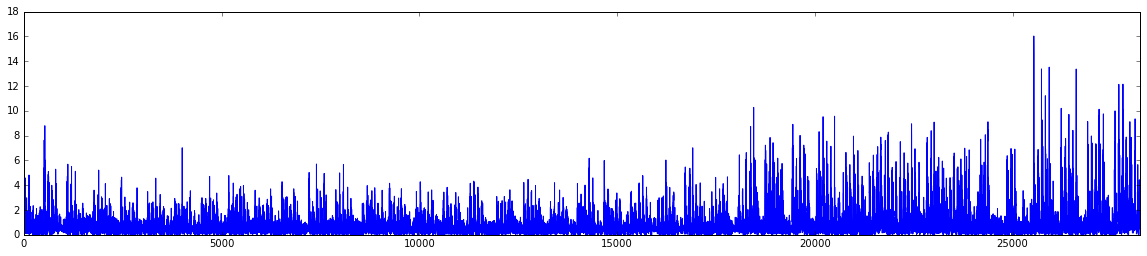

In [113]:
l['diff'].plot(figsize=(20,4))

### id12041992

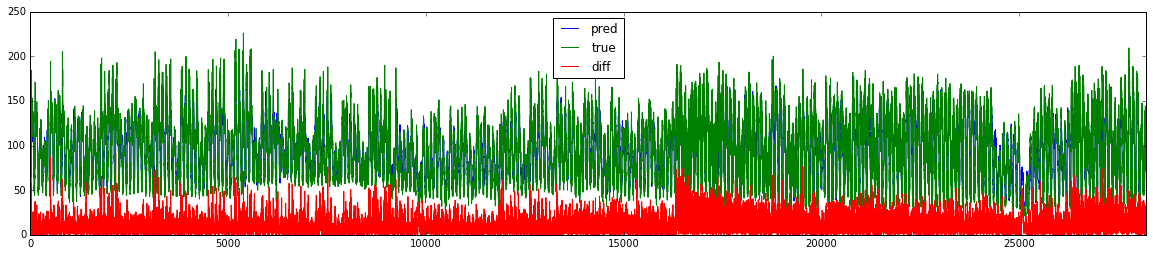

In [117]:
l.plot(figsize=(20,4))

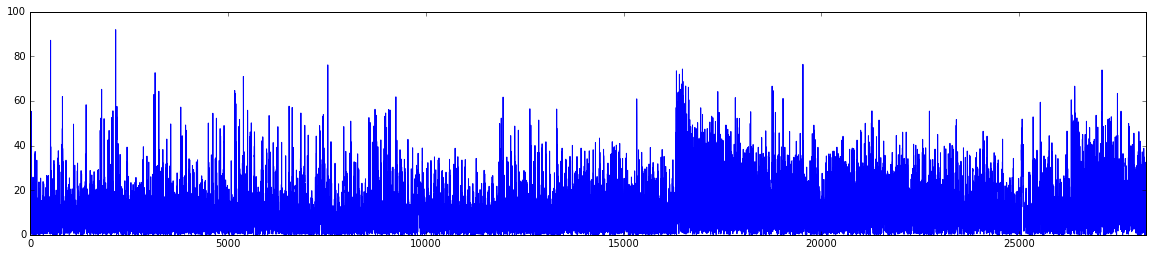

In [118]:
l['diff'].plot(figsize=(20,4))

### id12041022

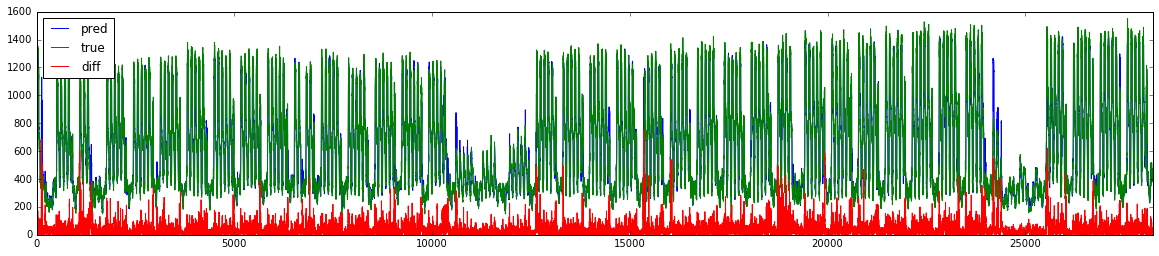

In [121]:
l.plot(figsize=(20,4))

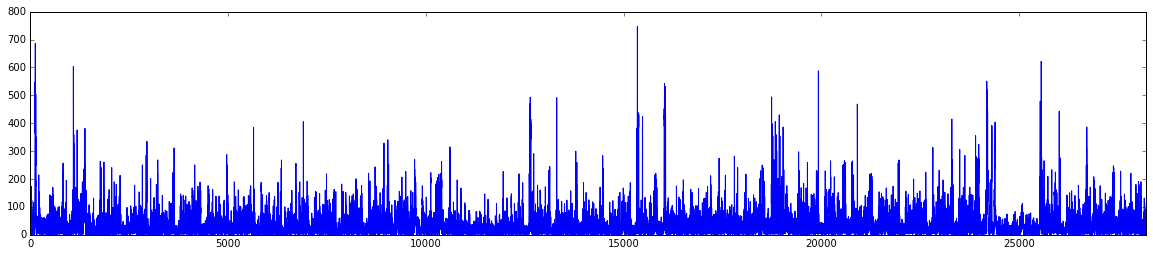

In [122]:
l['diff'].plot(figsize=(20,4))

### id11010024

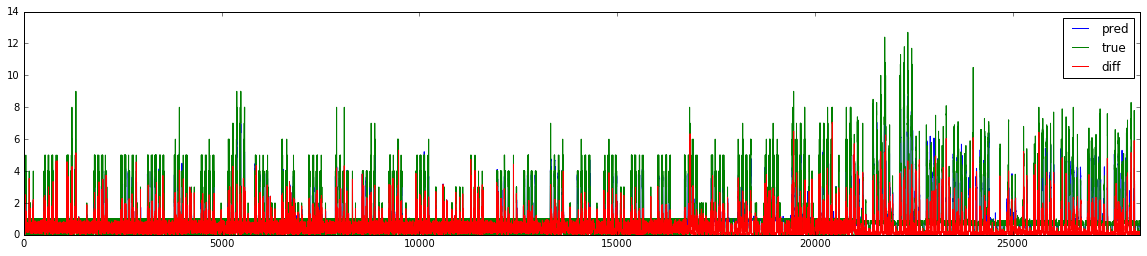

In [126]:
l.plot(figsize=(20,4))

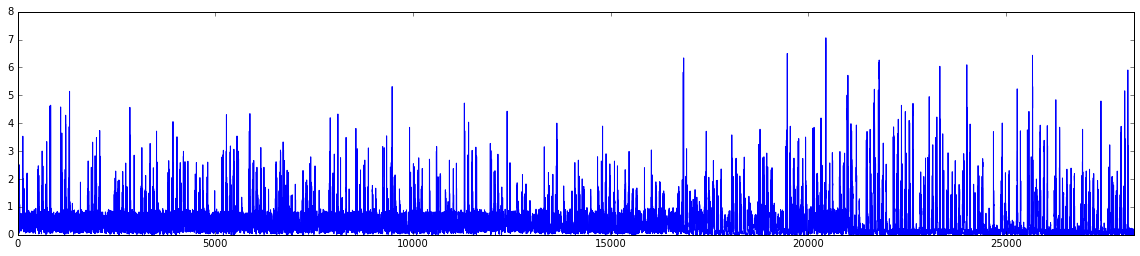

In [127]:
l['diff'].plot(figsize=(20,4))

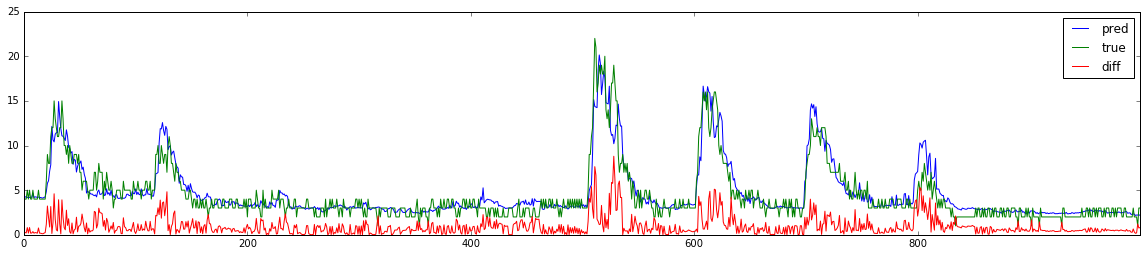

In [110]:
l[0:1000].plot(figsize=(20,4))

## Comments

- Samo z diffi ne vidimo nic pametnega. 

- Komplicirano bi bila tudi vizualizacija offline in batcha vzporedno. Lazje je, ce na novo natreniras nek batch model (do 80%) in offline model (do 99%) in potem naredis predikcijo za zadnji 1% in primerjas.

- Treba bo naracunati po dnevih error metrike.

- Ampak to ze vidim da bo problem za zdruzevat z Klemnovim online rezultati, ker bo on moral vse v naprej sprocesirat, namesto da zapise samo predicted values v nek csv, kar je potencialno lahko razlog da nebo konsistentno.